In [1]:
!pip install bangla_stemmer
!pip install bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bnlp import NLTKTokenizer
from bs4 import BeautifulSoup
from bnlp import BengaliCorpus as corpus
import re
from bangla_stemmer.stemmer import stemmer

In [2]:
df_train = pd.read_excel("F:/Context_Aware_Data_Cleaning/Jannat/MEBOC_TDC/Dataset\BEmoC7k.xlsx")

In [3]:
df_train.head()

,TEXT,classes
0,নাইমা কি করবেন আমরা জানি,sadness
1,ভাই সব আপনাদের খুব ভাল লাগছে,joy
2,গাঞ্জা খাইয়া নিউজ শেয়ার করছে দিগন্ত বয়কটে ...,anger
3,অনেক ধন্যবাদ স্যার যশোরে ইত্যাদি অনুষ্ঠান করার...,joy
4,বর্তমানে মুসলমান মারে যে জন সে জন হয়েছে ঈশ্বর,disgust


In [4]:
df_train.dropna(inplace=True)

In [5]:
longest_string = max(df_train["TEXT"], key=len)
print(len(longest_string))

1093


In [6]:
df_train['classes'].value_counts()

joy         1524
disgust     1356
sadness     1327
anger       1052
fear         962
surprise     779
Name: classes, dtype: int64

In [10]:
# Instantiate the NLTKTokenizer
bnltk = NLTKTokenizer()


def remove_stopwords(text):
    # Get the list of Bengali stopwords
    bengali_stopwords = corpus.stopwords
    
    # Tokenize the Bengali text using NLTKTokenizer
    word_tokens = bnltk.word_tokenize(text)
    
    # Remove stopwords
    filtered_tokens = [token for token in word_tokens if token not in bengali_stopwords]
    
    # Join the filtered tokens back into a text
    filtered_text = ' '.join(filtered_tokens)
    
    return filtered_text


In [11]:
df_train['TEXT'] = df_train['TEXT'].apply(remove_stopwords)

In [16]:
longest_string = max(df_train["TEXT"], key=len)
print(len(longest_string))

646


In [17]:
df_train['TEXT'] 

0                                              নাইমা জানি
1                                        ভাই আপনা ভাল লাগ
2           গাঞ্জা খাইয়া নিউজ শেয় দিগন্ত বয়কটে জরিমানা
3                              ধন্যবাদ স্য যশোরে অনুষ্ঠান
4                          বর্তমানে মুসলমান মারে হয় ঈশ্বর
                              ...                        
6995    হে আল্লাহ দেশের সহায়ক মহামারী নিকট আশ্রয় চাই...
6996    ঈদ ছারা যুদি বাংলাদেশ ঈদের খুশির অামেজ পান নিব...
6997    বছর সবচ সের ভিডি দেখেছি দেশের সাথে ভূটান ভাল স...
6998                কিরে মিথ্যা কথা কস গতদিন আসিফ আস খালি
6999    ভাইরেভাই বেস্ট এই বেস্ট এইরকম পারফেক্ট গল্প মু...
Name: TEXT, Length: 7000, dtype: object

In [18]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_train, test_size=0.2,stratify=df_train['classes'],random_state=42)

In [19]:
X_train  =  train_df['TEXT'].values.tolist()
y_train = train_df['classes'].tolist()

In [20]:
X_test =  test_df['TEXT'].values.tolist()
y_test = test_df['classes'].tolist()

In [32]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 58.6 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 43.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 26.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 10.9 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.40.0-py3-none-any.whl size=25319454 sha256=29dd4369e5d32a8d4a42f2bca0410ea3a1db7631a88f1937398ed9c72046cef2
  Stored in directory: /root/.cache/pip/wheels/00/2d/0f/1fcda

In [33]:
import ktrain
from ktrain import text
MODEL_NAME = 'FacebookAI/xlm-roberta-base'
t = text.Transformer(MODEL_NAME, maxlen=500)

config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

In [34]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 9
	95percentile : 22
	99percentile : 28


tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/528k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 10
	95percentile : 22
	99percentile : 28


In [35]:
print(trn)

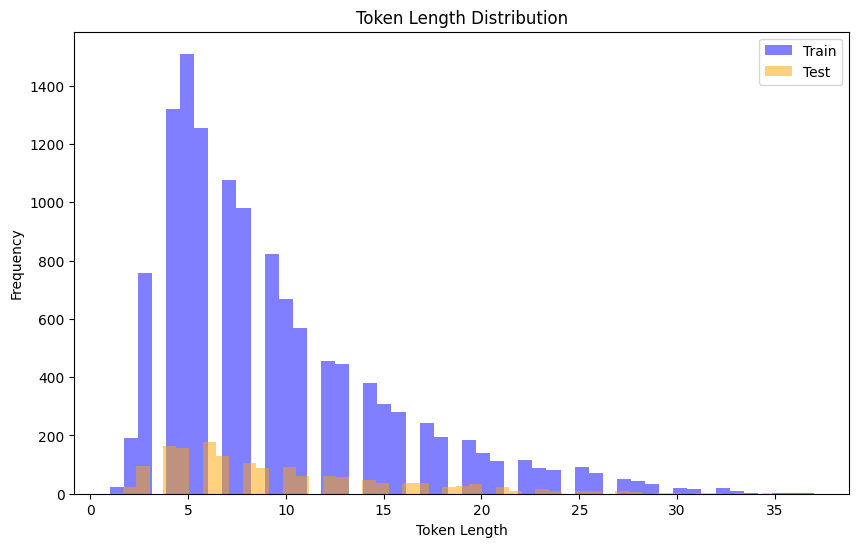

In [36]:
import matplotlib.pyplot as plt

# Calculate token lengths for train and test datasets
train_token_lengths = [len(t.split()) for t in X_train]
test_token_lengths = [len(t.split()) for t in X_test]

# Plot token length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_token_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, color='orange', label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [37]:
model = t.get_classifier()

In [38]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [39]:
# Adding early stopping callback from TensorFlow
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=5, mode='auto')

In [ ]:
history = learner.fit_onecycle(2e-5, 10,callbacks=[early_stopping])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
1572/1572 [==============================] - 913s 564ms/step - loss: 0.9139 - accuracy: 0.5831 - val_loss: 0.8464 - val_accuracy: 0.6477
Epoch 2/10
 409/1572 [======>.......................] - ETA: 10:49 - loss: 0.7350 - accuracy: 0.6910

In [ ]:
# Save the trained model
learner.save_model('/kaggle/output/model.zip')

In [ ]:
classes=t.get_classes()

In [ ]:
cm = learner.validate(class_names=t.get_classes())

In [ ]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [ ]:
!zip -r mental.zip /kaggle/output/model

In [ ]:
!ls

In [ ]:
# from IPython.display import FileLink
# FileLink(r'/kaggle/working/mental-health-rand.zip')

In [ ]:
# df_cm = pd.DataFrame(cm, index=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "],
#                      columns=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "])
# plt.figure(figsize = (10,7))
# sns.heatmap(df_cm,annot=True, fmt ="d")